<a href="https://colab.research.google.com/github/a-brhian/Probabilidade_e_Estatistica/blob/main/Estimadores_DEVORE_cap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimação

Para explorar determinadas propriedades probabilisticas de uma população, às vezes é interessante encontrar uma função de distribuição (ou massa) de probabilidade (fdp ou fmp) que se ajuste a ela.

Porém, muitas vezes não podemos ter acesso à essa população, mas a uma amostra que pode ser bem representativa dessa população. Quando dispomos desse tipo de amostra em um boa quantidade, podemos estimar os parâmetros dessas fdps (ou fmps) por meio de algumas metodologias.

In [1]:
#-------------------------------------------
# INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNOLOGIA DO AMAZONAS
#
# CREATED BY: ALYSSON BRHIAN DE SOUZA MUNIZ SILVA
# DATA: 18/05/2025
# VERSION OF R: 4.5.0
#
# GOAL: Capítulo 6 do Devore
#rm(list=ls());gc();setwd(path_name);save.image("???.RData")
#---------------------------------------------
R.version.string

[1] "R version 4.5.0 (2025-04-11)"

## Banco de dados

Nosso banco de dados diz respeito o vício que as redes sociais trazem na vida dos estudantes. Esses estudantes, oriundo de vários países, tem uma idade entre 16 e 25 anos, e responderam um questionário no 1° quadrimestre de 2025.

Essas e outras informações foram acessadas em 18 de maio de 2025 e estão disponíveis no seguinte link:

https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?resource=download

Esse banco de dados será carregado por meio da seguinte variável:


In [3]:
dados <- read.csv("/content/sample_data/students_social_media_addiction.csv",header=T)

head(dados)
tail(dados)
dim(dados)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>
1,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
6,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>
700,700,22,Male,Graduate,UK,6.2,Twitter,Yes,6.3,5,Single,4,8
701,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
702,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
704,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
705,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


[1] 705  13

In [ ]:
Vamos trabalhar com estudantes que estavam na graduação e que acessavam o Instagram:

In [11]:
dados.f <- dados[dados$Academic_Level == "Undergraduate" & dados$Most_Used_Platform == "Instagram",]
head(dados.f)
dim(dados.f)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>
1,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
6,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
23,23,19,Male,Undergraduate,Austria,4.9,Instagram,Yes,5.8,6,Complicated,3,7
35,35,19,Male,Undergraduate,Hong Kong,4.7,Instagram,Yes,5.8,6,In Relationship,3,7
47,47,19,Male,Undergraduate,Colombia,4.8,Instagram,Yes,5.9,6,In Relationship,3,7
59,59,19,Male,Undergraduate,Iceland,4.6,Instagram,Yes,5.9,6,Complicated,3,7


[1] 155  13

##Bernoulli

Como a va *Gender* é do tipo binária, então podemos atribuir a essa va uma fmp *Bernoulli(p)*. Considere que *p* é a proporção de encontrar *homens* nesse banco de dados, então podemos estimar *p* por meio dos seguintes códigos:

In [23]:
p.tot <- table(dados.f$Gender)/dim(dados.f)[1]; p.tot
cat('\n')
p <- round(p.tot[2],3); p


    Female       Male 
0.90322581 0.09677419 

Male 
0.097

## Poisson

Se consideramos que a va *Conflicts_Over_Social_Media* tem uma distribuição $Poisson(\lambda)$, então podemos saber qual a probabilidade de uma pessoa ter exatamente 4 conflitos por conta da rede social.

O parâmetro $\lambda$ pode ser estimado por meio do seguinte algoritmo:

In [25]:
lambda <- round(mean(dados.f$Conflicts_Over_Social_Media),3); lambda

[1] 2.884

A probabilidade de uma pessoa ter exatamente 4 conflitos pode ser calculado por meio da seguinte função:

In [27]:
round(dpois(x=4,lambda),3)*100

[1] 16.1

## Gama

Vamos analisar o histograma da va *Sleep_Hours_Per_Night*:

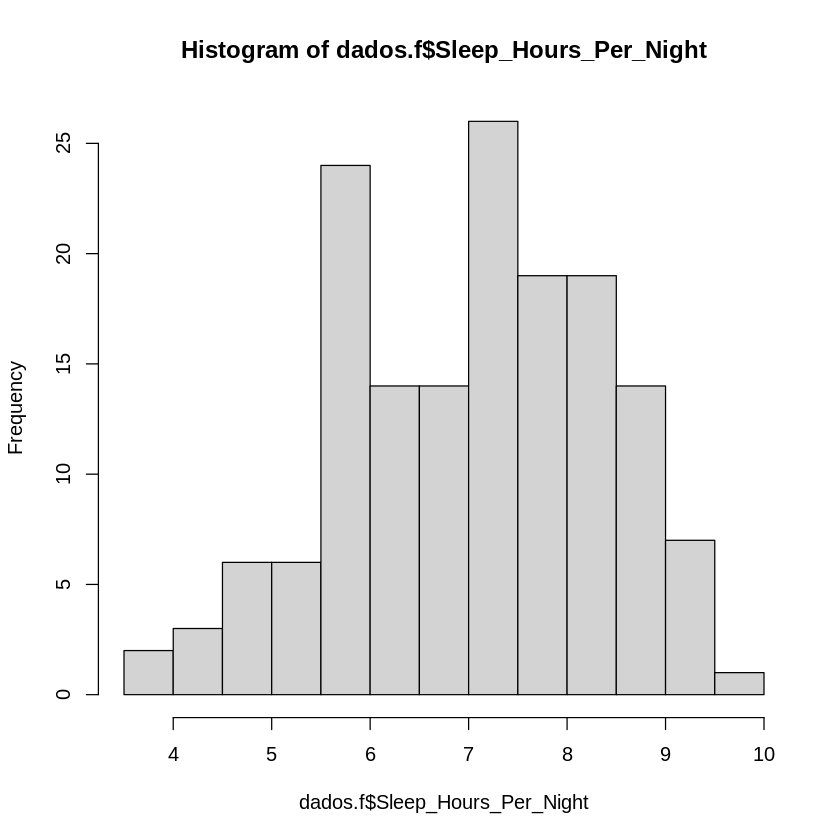

In [35]:
hist(dados.f$Sleep_Hours_Per_Night)

Nota-se que essa va só pode apresentar valores positivos além de apresentar uma leve inclinação para direita.

Para esse tipo de dado, uma distribuição que consegue cobrir esse tipo de característica é a distribuição Gama.

Esses parâmetros podem ser calculados por um método chamado de "Método da Máxima Verossimilhança":

In [42]:
require("MASS")

fitdistr(dados.f$Sleep_Hours_Per_Night,"gamma")

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


     shape         rate   
  28.1003663    3.9610382 
 ( 3.1731560) ( 0.4512976)

[1] 0

Os parâmetros também podem ser calculados por meio de um outro método denominado de "Método dos Momentos":

In [44]:
alpha.p <- mean(dados.f$Sleep_Hours_Per_Night)^2/sd(dados.f$Sleep_Hours_Per_Night); round(alpha.p,3)

[1] 38.822

In [45]:
beta.p <- sd(dados.f$Sleep_Hours_Per_Night)/mean(dados.f$Sleep_Hours_Per_Night); round(beta.p,3)

[1] 0.183

## Normal (Gaussiana)

As vezes, o pesquisar deseja que as suas va se ajustem a uma fdp Normal por conta de uma série de vantagens que essa fdp permite obter dos dados. No nosso caso, usaremos a mesma va usada na fdp Gamma para verificar se uma fdp Normal pode ser aplicado a esse tipo de dados.

Estimar os parâmetros de uma fdp Normal é fácil pois necessitamos calcular apenas a média e o desvio padrão dos dados:

In [46]:
media <- mean(dados.f$Sleep_Hours_Per_Night); round(media, 3)

[1] 7.094

In [47]:
desvio <- sd(dados.f$Sleep_Hours_Per_Night); round(desvio, 3)

[1] 1.296